In [17]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [12]:
# import the dataset
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')


In [3]:
# m double checking the size
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (464809, 54)
y_train shape: (464809, 1)
X_test shape: (116203, 54)
y_test shape: (116203, 1)


In [13]:
# feature selection using feature importance from a decision tree
tree_clf_for_selection = DecisionTreeClassifier()
tree_clf_for_selection.fit(X_train, y_train.values.ravel())
model = SelectFromModel(tree_clf_for_selection, prefit=True)

X_train_reduced = model.transform(X_train)
X_test_reduced = model.transform(X_test)

In [15]:
# train the decision tree model
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_reduced, y_train.values.ravel())

DecisionTreeClassifier()

In [35]:
class_names = y_train[y_train.columns[0]].astype(str).unique().tolist()

# figure our which features were retained
selected_features = X_train.columns[model.get_support()].tolist()
print("Selected Features:", selected_features)



Selected Features: ['Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [18]:
y_pred = tree_clf.predict(X_test_reduced)

report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

Accuracy: 0.9180916155348829
Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.92      0.92     42557
           2       0.93      0.93      0.93     56500
           3       0.90      0.90      0.90      7121
           4       0.81      0.79      0.79       526
           5       0.77      0.78      0.78      1995
           6       0.83      0.83      0.83      3489
           7       0.92      0.92      0.92      4015

    accuracy                           0.92    116203
   macro avg       0.87      0.87      0.87    116203
weighted avg       0.92      0.92      0.92    116203



In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9180916155348829


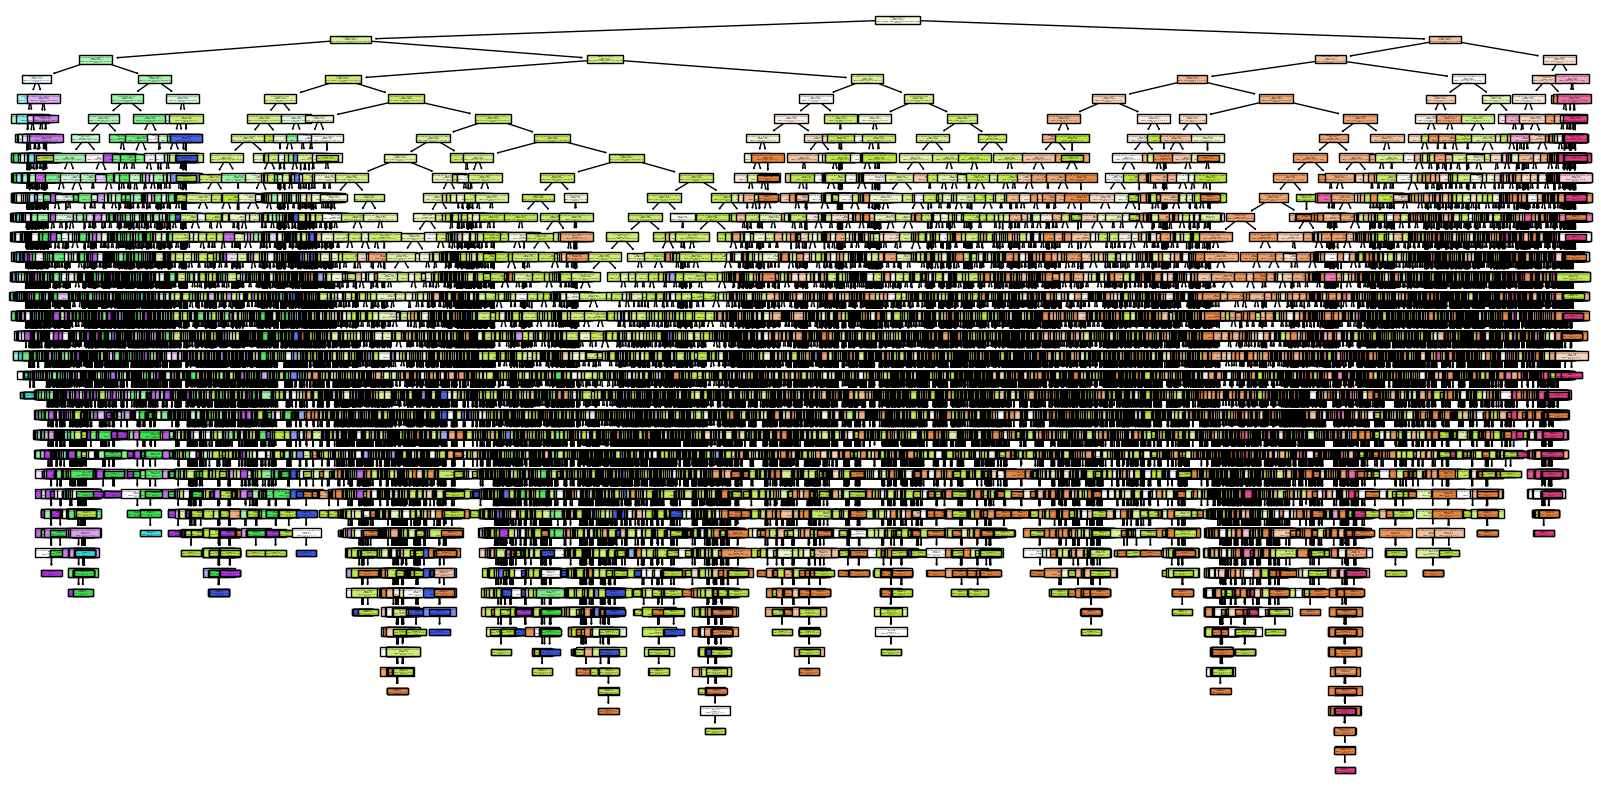

In [34]:
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, feature_names=selected_features, class_names=class_names)
plt.show()